In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import math
from numpy import linalg as la
from scipy.stats import multivariate_normal

In [2]:
data = pd.read_csv('faithful.dat.txt', skiprows=20, delim_whitespace=True)
data

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51
10,4.350,85


In [3]:
eruptions = np.array(data['eruptions'])
waiting = np.array(data['waiting'])

In [4]:
np.shape(eruptions)

(272,)

In [5]:
np.shape(waiting)

(272,)

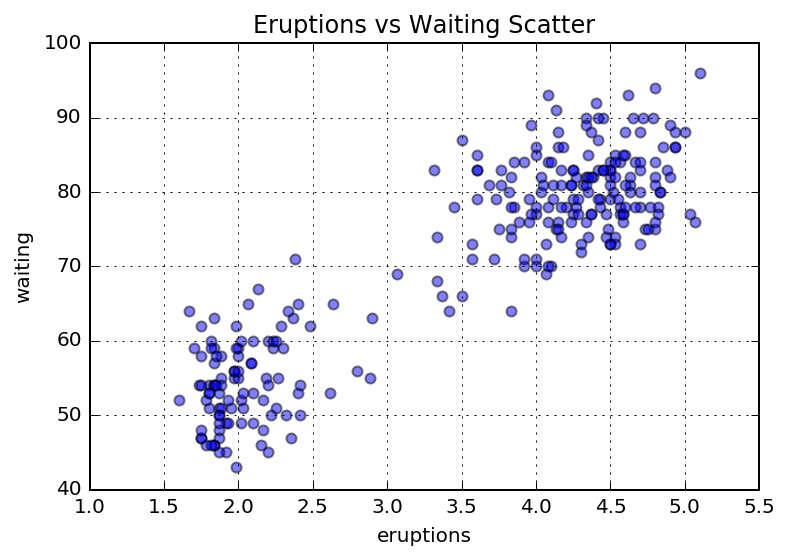

In [6]:
%config InlineBackend.figure_format = 'retina'
plt.scatter(eruptions, waiting, s=25, alpha=0.5, marker='o')
plt.title('Eruptions vs Waiting Scatter')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.grid(True)
plt.show()

In [7]:
eruptions_norm = []
waiting_norm = []

## b)

In [8]:
#part_b normalize eruptions data
for i in range(len(eruptions)):
    eruptions_norm.append((eruptions[i] - np.amin(eruptions))/(np.amax(eruptions) - np.amin(eruptions)))

In [9]:
np.shape(eruptions_norm)

(272,)

In [10]:
#part_b normalize waiting data
for i in range(len(waiting)):
    waiting_norm.append((waiting[i] - np.amin(waiting))/(np.amax(waiting) - np.amin(waiting)))

In [11]:
np.shape(waiting_norm)

(272,)

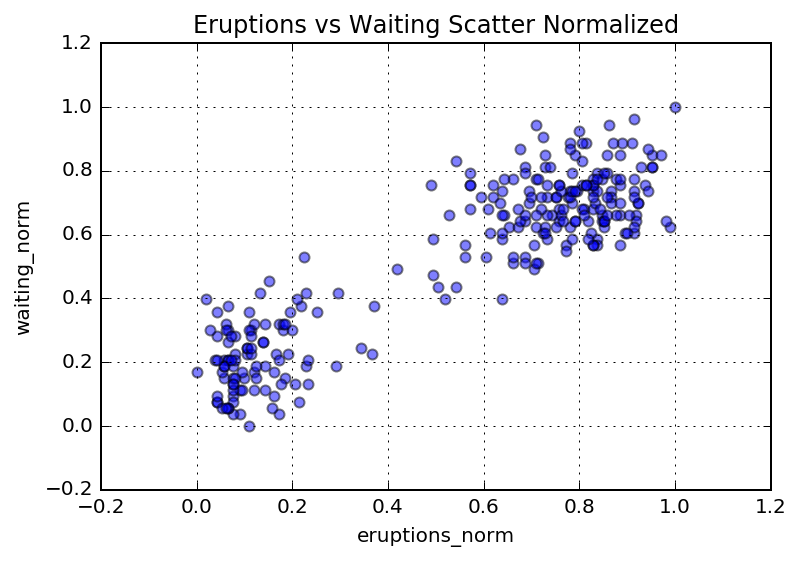

In [12]:
%config InlineBackend.figure_format = 'retina'
plt.scatter(eruptions_norm, waiting_norm, s=25, alpha=0.5, marker='o')
plt.title('Eruptions vs Waiting Scatter Normalized')
plt.xlabel('eruptions_norm')
plt.ylabel('waiting_norm')
plt.grid(True)
plt.show()

## c)

In [13]:
eruptions_norm = np.array(eruptions_norm)
waiting_norm = np.array(waiting_norm)

In [14]:
data_norm = np.vstack((eruptions_norm, waiting_norm)).T

In [15]:
'''
def multi_gaussian_pdf(data, mu, cov):
    for i in range(len(data)):
        f[i] = (1/(2*np.pi*np.sqrt(la.det(cov))))*np.exp(np.dot(np.dot((-1/2)*(data[i] - mu).reshape(-1, 1).T, la.inv(cov)), (data[i] - mu).reshape(-1, 1)));
    return f
'''

'\ndef multi_gaussian_pdf(data, mu, cov):\n    for i in range(len(data)):\n        f[i] = (1/(2*np.pi*np.sqrt(la.det(cov))))*np.exp(np.dot(np.dot((-1/2)*(data[i] - mu).reshape(-1, 1).T, la.inv(cov)), (data[i] - mu).reshape(-1, 1)));\n    return f\n'

In [16]:
# def GMM_EM(data):
#     # Initialize mu and sigma
#     mu = data[np.random.choice(range(len(data)), 2, replace=False)];
# #     print (mu)
#     mu1 = mu[0];
#     mu2 = mu[1];
    
#     #sigma0 = np.mean(np.cov(data.T));
#     #sigma1 = sigma0 * np.identity(2);
#     #sigma2 = sigma0 * np.identity(2);
#     sigma1 = np.cov(data.T);
#     sigma2 = np.cov(data.T);
#     #sigma1 = np.identity(2);
#     #sigma2 = np.identity(2);
#     #sigma1 = np.dot(data.T, data)
#     #sigma2 = np.dot(data.T, data)
    
#     pi1 = 0.5;
#     pi2 = 1 - pi1;
    
#     # Start EM
#     iteration = 0
#     mu1_move = []
#     mu2_move = []
#     traj_eruption_1 = []
#     traj_eruption_2 = []
#     traj_waiting_1= []
#     traj_waiting_2= []
    
#     print (mu1)
    
#     while True:
#         oldMu1 = mu1
#         oldMu2 = mu2
        
#         traj_eruption_1.append(oldMu1[0])
#         traj_waiting_1.append(oldMu1[1])
#         traj_eruption_2.append(oldMu2[0])
#         traj_waiting_2.append(oldMu2[1])
        
#         mu1_move.append(oldMu1)
#         mu2_move.append(oldMu2)
#         #E-step: get PDFs
#         pdf1 = np.zeros(len(data));
#         pdf2 = np.zeros(len(data));
#         for j in range(len(data)):
#             pdf1[j] = multivariate_normal.pdf(data[j], mean=mu1, cov=sigma1);
#             pdf2[j] = multivariate_normal.pdf(data[j], mean=mu2, cov=sigma2);
        
#         #print (pdf1)
        
#         #E-step: get Gammas
#         gamma1 = (pi1 * pdf1) / (pi1 * pdf1 + pi2 * pdf2);
#         gamma2 = (pi2 * pdf2) / (pi1 * pdf1 + pi2 * pdf2);
        
#         print (gamma1.shape)
        
#         #M-step: Update Mus and Sigmas
#         mu1 = np.dot(gamma1.reshape(-1,1).T, data) / np.sum(gamma1);
#         mu2 = np.dot(gamma2.reshape(-1,1).T, data) / np.sum(gamma2);
        
#         '''
#         tempSigma_1 = [];
#         tempSigma_2 = [];
#         for i in range(len(data)):
#             tempSigma_1.append(np.dot(gamma1[i] * (data[i] - mu1).reshape(-1, 1), (data[i] - mu1).reshape(-1, 1).T) / np.sum(gamma1));
#             tempSigma_2.append(np.dot(gamma2[i] * (data[i] - mu2).reshape(-1, 1), (data[i] - mu2).reshape(-1, 1).T) / np.sum(gamma2));
        
#         sigSum1 = np.sum(tempSigma_1, axis=0) 
#         sigSum2 = np.sum(tempSigma_2, axis=0)
#         '''
        
#         oldSigma_1 = sigma1;
#         oldSigma_2 = sigma2;
#         for i in range(len(data)):
#             tempSigma_1 = np.dot(gamma1[i] * (data[i] - mu1).reshape(-1, 1), (data[i] - mu1).reshape(-1, 1).T) / np.sum(gamma1);
#             tempSigma_2 = np.dot(gamma2[i] * (data[i] - mu2).reshape(-1, 1), (data[i] - mu2).reshape(-1, 1).T) / np.sum(gamma2);
#             sigma1 = oldSigma_1 + tempSigma_1;
#             sigma2 = oldSigma_2 + tempSigma_2;
        
#         #sigma1 = np.mean(sigma1) * np.identity(2);
#         #sigma2 = np.mean(sigma2) * np.identity(2);
        
#         #Update Pis
#         pi1 = np.sum(gamma1) / len(data);
#         pi2 = 1 - pi1;
        
#         print (oldMu1)
#         print (mu1)
#         print (np.allclose(mu1, oldMu1))
#         # test if convergent
#         if (np.allclose(mu1, oldMu1) == True) and (np.allclose(mu2, oldMu2) == True):
#             break
#         else:
#             iteration = iteration + 1;
        
        
#         print (mu1_move)
#         print (traj_eruption_1)
#         print (traj_waiting_1)
    
#         return iteration, traj_eruption_1, traj_waiting_1, traj_eruption_2, traj_waiting_2

In [17]:
# GMM_EM(data_norm)

In [18]:
'''totalIter = []
for i in range(50):
    totalIter.append(GMM_EM(data_norm)[0]);
    '''

'totalIter = []\nfor i in range(50):\n    totalIter.append(GMM_EM(data_norm)[0]);\n    '

In [19]:
# part C
#Step 1: Initial
import random
mu_1 = np.array([.1, .2])
sigma_1 = np.identity(2)
mu_2 = np.array([.9,.8])
sigma_2 = np.identity(2)
pi = 0.5

print (mu_1)
print (mu_2)

[ 0.1  0.2]
[ 0.9  0.8]


In [20]:
N = len(data_norm)
print (N)
#step 2: compute responsblities
def getResponsibilities(mu_1, sigma_1, mu_2, sigma_2, pi):
    gammas = np.zeros(N)
    for i in range(N):
        gamma = (pi * multivariate_normal.pdf(data_norm
                                              [i,:], mu_2, sigma_2)) / ((1 - pi) * multivariate_normal.pdf(data_norm[i,:], mu_1, sigma_1) + pi * multivariate_normal.pdf(data_norm[i,:], mu_2, sigma_2))
        gammas[i] = gamma
    return gammas

272


In [21]:
#step 3 updateMeans and variances
def update(mu_1, sigma_1, mu_2, sigma_2, pi):
    gammas = getResponsibilities(mu_1, sigma_1, mu_2, sigma_2, pi)
    # get update new means from responsbilities
    mu_1_0 = sum((1 - gammas) * data_norm[:,0])
    mu_1_1 = sum((1 - gammas) * data_norm[:,1])
    mu_1_new = np.array([mu_1_0, mu_1_1])
    mu_1_new = mu_1_new / float(sum(1 - gammas))
    
    mu_2_0 = sum(gammas * data_norm[:,0])
    mu_2_1 = sum(gammas * data_norm[:,1])
    mu_2_new = np.array([mu_2_0, mu_2_1])
    mu_2_new = mu_2_new / float(sum(gammas))
   
    # get update for new variance
    s_sigma_1 = np.zeros((2,2))
    for i in range(N):
        s_sigma_1 += (1 - gammas[i]) * (data_norm[i,:] - mu_1_new).dot((data_norm[i,:] - mu_1_new).T)
    s_sigma_1 = s_sigma_1 / float(sum(1 - gammas))
    sigma_1_new = s_sigma_1 * np.identity(2)
    
    s_sigma_2 = np.zeros((2,2))
    for i in range(N):
        s_sigma_2 += gammas[i] * (data_norm[i,:] - mu_2_new).dot((data_norm[i,:] - mu_2_new).T)
    s_sigma_2 = s_sigma_2 / float(sum(gammas))
    sigma_2_new = s_sigma_2 * np.identity(2)
    
    # get new pi
    pi_new = sum(gammas) / float(N)
    
    return mu_1_new, sigma_1_new, mu_2_new, sigma_2_new, pi_new

In [22]:
#Step 4: Iterate until Convergence
trajectory_mu_1 = []
trajectory_mu_2 = []

#%Diff is < 1e-5

trajectory_mu_1.append(mu_1)
trajectory_mu_2.append(mu_2)
for i in range(50):
    mu_1_prev = mu_1
    mu_2_prev = mu_2
    
    mu_1, sigma_1, mu_2, sigma_2, pi = update(mu_1, sigma_1, mu_2, sigma_2, pi)
    trajectory_mu_1.append(mu_1)
    trajectory_mu_2.append(mu_2)
    
    if la.norm(mu_1 - mu_1_prev) < 1e-5 and la.norm(mu_2 - mu_2_prev) < 1e-5:
        break
trajectory_mu_1 = np.array(trajectory_mu_1)
trajectory_mu_2 = np.array(trajectory_mu_2)

In [23]:
def printTra(trajectory_mu_1):
    from matplotlib.collections import LineCollection
    # Plot the trajectories of two mean vectors in 2 dimensions
    z = np.arange(len(trajectory_mu_1))
    fig = plt.figure()
    ax = plt.axes()
    points = np.array([trajectory_mu_1[:,0], trajectory_mu_1[:,1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments)
    lc.set_array(z)
    lc.set_linewidth(5)
    plt.gca().add_collection(lc)
    axcb = fig.colorbar(lc)
    axcb.set_label('Iteration')
    plt.show()

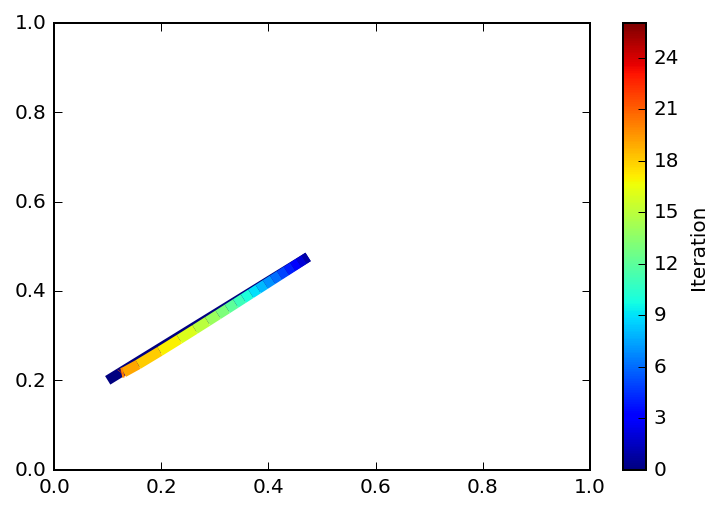

In [24]:
printTra(trajectory_mu_1)

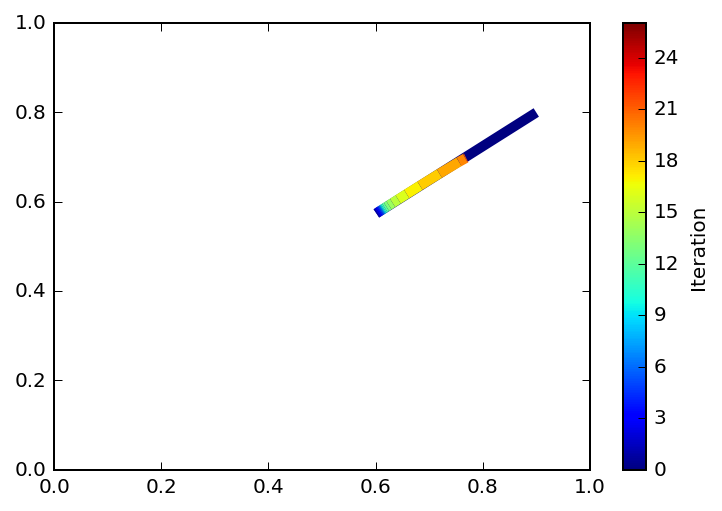

In [25]:
printTra(trajectory_mu_2)

In [26]:
# 50 times different initial parameter guesses
iterations = []
for j in range(50):
    mu_1 = np.random.random(2)
    sigma_1 = np.identity(2)
    mu_2 = np.random.random(2)
    sigma_2 = np.identity(2)
    pi = 0.5

    iteration = 0
    while True:
        mu_1_prev = mu_1
        mu_2_prev = mu_2

        mu_1, sigma_1, mu_2, sigma_2, pi = update(mu_1, sigma_1, mu_2, sigma_2, pi)

        iteration += 1
        if la.norm(mu_1 - mu_1_prev) < 1e-5 and la.norm(mu_2 - mu_2_prev) < 1e-5:
            iterations.append(iteration)
            break
# print (iterations)

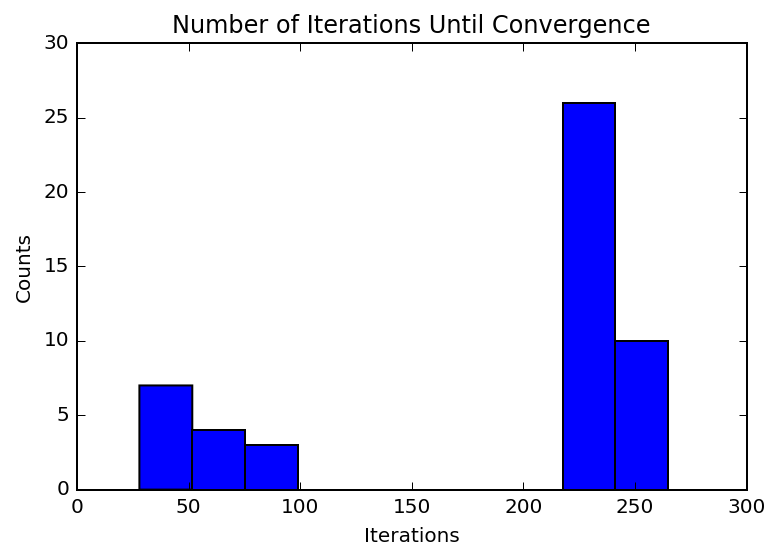

In [27]:

plt.figure()
plt.hist(iterations)
plt.xlabel("Iterations")
plt.ylabel("Counts")
plt.title("Number of Iterations Until Convergence")
plt.show()

In [28]:
def k_means():
    c = np.random.randint(0,2,272)
    m_0 = np.zeros(2)
    m_1 = np.zeros(2)
    for j in range(5):
        m_0 = np.zeros(2)
        m_1 = np.zeros(2)
        for i in range(272):
            if c[i] == 0:
                m_0 += data_norm[i,:]
            else:
                m_1 += data_norm[i,:]
        m_0 = m_0 / float(272 - sum(c))
        m_1 = m_1 / float(sum(c))
        for i in range(272):
            if la.norm(data_norm[i,:] - m_0) < la.norm(data_norm[i,:] - m_1):
                c[i] = 0
            else:
                c[i] = 1
    
    # now we have stable cluster, get variance and pi
    sig_0 = np.identity(2)
    sig_1 = np.identity(2)
    sig_0_coeff = 0
    sig_1_coeff = 0
    for k in range(272):
        if c[k] == 0:
            sig_0_coeff += la.norm(data_norm[k,:] - m_0)
        else:
            sig_1_coeff += la.norm(data_norm[k,:] - m_1)
    sig_0_coeff = sig_0_coeff / float(272 - sum(c))
    sig_1_coeff = sig_1_coeff / float(sum(c))    
    sig_0 = sig_0_coeff * sig_0
    sig_1 = sig_1_coeff * sig_1
    pi_ = sum(c) / float(272)
    return m_0, sig_0, m_1, sig_1, pi_

In [29]:
# part D repeat C with Kmeans
Kiterations = []
for j in range(50):
    # get mean, covaraince from k_means
    mu_1, sigma_1, mu_2, sigma_2, pi = k_means()

    #%Diff is < 1e-5
    iteration = 0
    while True:
        mu_1_prev = mu_1
        mu_2_prev = mu_2

        mu_1, sigma_1, mu_2, sigma_2, pi = update(mu_1, sigma_1, mu_2, sigma_2, pi)

        iteration += 1
        if la.norm(mu_1 - mu_1_prev) < 1e-5 and la.norm(mu_2 - mu_2_prev) < 1e-5:
            Kiterations.append(iteration)
            break
# print (Kiterations)

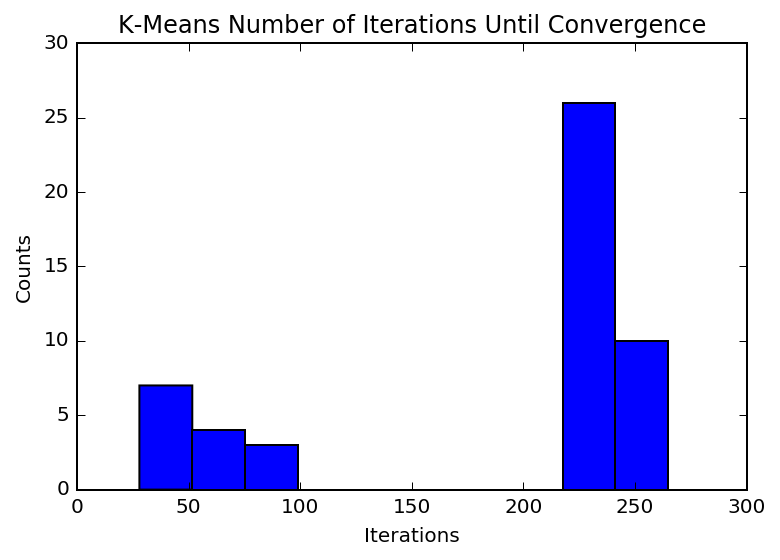

In [30]:

plt.figure()
plt.hist(iterations)
plt.xlabel("Iterations")
plt.ylabel("Counts")
plt.title("K-Means Number of Iterations Until Convergence")
plt.show()